<a href="https://colab.research.google.com/github/GustavoRosso/PythonEMercadoFinanceiro/blob/main/CAP%C3%8DTULO_9_FINAN%C3%87AS_E_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CAPÍTULO 9 - FINANÇAS E PYTHON

#Explicação

##9.1.1 VALOR PRESENTE - Explicação


In [9]:
# 9.1.1 VALOR PRESENTE - Explicação
# Cálculo do Valor Presente

def vp(vf, r , n):
    x = vf / (1 + r)** n
    return(x)

#++++++++++++++ Programa principal ++++++++++++++
valor = vp(100,0.1,1)    # Chamada da função vp
print('++++++++++++++++++++++++++++++++')
print(' ')
print('Valor presente = ', valor)

++++++++++++++++++++++++++++++++
 
Valor presente =  90.9090909090909


##9.1.2 VALOR PRESENTE LÍQUIDO - Explicação 1
### Cálculo do VPL


In [12]:
pip install numpy-financial

In [10]:
# 9.1.2 VALOR PRESENTE LÍQUIDO - Explicação 1
# Cálculo do VPL

import numpy as np
import numpy_financial as npf

vinicial = -155000
esaida = 70000 - 15000
FC = np.array([vinicial, esaida, esaida, esaida, esaida, esaida , esaida])

#++++++++++++++ VPL na biblioteca numpy
investimento = npf.npv(rate = 0.17, values = FC)
                   # A função npv agora está na biblioteca numpy_financial
                   # pip install numpy-financial para instalar

print('++++++++++++++++++++++++++++++++')
print(' ')
print('VPL = ', investimento)

++++++++++++++++++++++++++++++++
 
VPL =  42405.161495817825


## 9.1.2 VALOR PRESENTE LÍQUIDO - Explicação 2
### Cálculo do VPL - FC não constante



In [16]:
# 9.1.2 VALOR PRESENTE LÍQUIDO - Explicação 2
# Cálculo do VPL - FC não constante

import numpy as np
import numpy_financial as npf

vinicial = -155000
esaida = np.zeros(6)
esaida[0] = 70000 - 15000
esaida[1] = 70000 - 25000
esaida[2] = 70000 - 35000
esaida[3] = 70000 - 15000
esaida[4] = 70000 - 25000
esaida[5] = 70000 - 10000

FC = np.array([vinicial, esaida[0], esaida[1], esaida[2], esaida[3], esaida[4], esaida[5]])

FC = np.array(FC)
#++++++++++++++ VPL na biblioteca numpy
investimento = npf.npv(rate = 0.17, values = FC)
                   # A função npv agora está na biblioteca numpy_financial
                   # pip install numpy-financial para instalar

print('++++++++++++++++++++++++++++++++')
print(' ')
print('VPL = ', investimento)
type(FC)

++++++++++++++++++++++++++++++++
 
VPL =  20000.69629223886


numpy.ndarray

##9.1.2 VALOR PRESENTE LÍQUIDO - Explicação 3
###Cálculo do VPL - FC não constante

In [18]:
# 9.1.2 VALOR PRESENTE LÍQUIDO - Explicação 3
# Cálculo do VPL - FC não constante

import numpy as np
import numpy_financial as npf

FC = np.zeros(7)
FC[0] = -155000
for i in range(6):
    FC[i+1] = 70000 - 15000
#++++++++++++++ VPL na biblioteca numpy
investimento = npf.npv(rate = 0.17, values = FC)
                   # A função npv agora está na biblioteca numpy_financial
                   # pip install numpy-financial para instalar

print('++++++++++++++++++++++++++++++++')
print(' ')
print('VPL = ', investimento)

++++++++++++++++++++++++++++++++
 
VPL =  42405.161495817825


##9.1.3 TAXA INTERNA DE RETORNO (TIR) - Explicação
###Cálculo da TIR - taxa interna de retorno

++++++++++++++++++++++++++++++
 
TIR = 27.04%


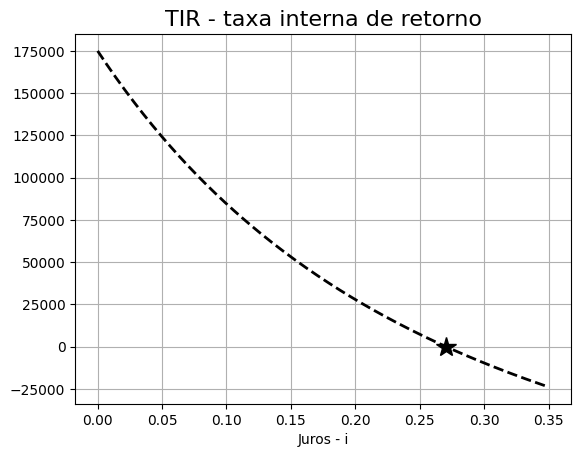

In [19]:
# 9.1.3 TAXA INTERNA DE RETORNO (TIR) - Explicação
# Cálculo da TIR - taxa interna de retorno
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as fig

FC = np.zeros(7)
FC[0] = -155000
for i in range(6):
    FC[i+1] = 70000 - 15000
#++++++++++++++++++ TIR na biblioteca numpy
tir = npf.irr(FC)
    # A função irr agora está na biblioteca numpy_financial
    # pip install numpy-financial para instalar

print('++++++++++++++++++++++++++++++')
print(' ')
print('TIR = ' +  str(round(100 * tir,2)) + '%')

eixox = np.linspace(0,0.35,200)
vpl = np.array([npf.npv(i,FC) for i in eixox]) # A função npv agora está na biblioteca numpy_financial
fig.plot(eixox,vpl,'--k',linewidth = 2)
fig.plot(tir,0,'k*',markersize = 15)
fig.xlabel('Juros - i')
fig.title('TIR - taxa interna de retorno', fontsize = 16)
fig.grid()

##9.2 RELAÇÃO RISCO VERSUS RETORNO EM CARTEIRAS DE INVESTIMENTO - Explicação 1
###Otimização de Portfólio

In [20]:
# 9.2 RELAÇÃO RISCO VERSUS RETORNO EM CARTEIRAS DE INVESTIMENTO - Explicação 1
# Otimização de Portfólio
import numpy as np
import pandas as pd

#++++++++++++++++ Nomes dos ativos ++++++++++++++++
ativo = ['A','B','C']
n = len(ativo)

#++++++++++++++++ Construção dos ativos ++++++++++++++++
A =  np.array([4,5,6,5,5,6,7,8,4,3,5])
B = np.array([1,5,10,4,11,7,8,3,1,5,7])
C = np.array([3,4,3,4,5,6,5,3,5,3,4])

#++++++++++++++++ Dataframe dos ativos ++++++++++++++++
df = pd.DataFrame([A,B,C], index = ativo)
prec = df.T      # Transposta para colocar os dados em colunas

#++++++++++++++++ Retorno dos preços ++++++++++++++++
ri = prec/prec.shift(1)
mi = ri.mean()   # Retorno médio dos ativos por coluna
sigma = ri.cov() # Covariância da carteira
print(' ')
print(' ')
print('+++++++++ Matriz de covariância da carteira +++++++++ ')
print(sigma)
#++++++++++ Peso da alocação dos investimentos ++++++++++

# w = np.array([0.6,0.3,0.1]) # Para pesos fixos

w = np.random.random(n) # Para pesos aleatórios
w = w/np.sum(w)

############# RETORNO E RISCO DA CARTEIRA #############
retorno = np.sum(w*mi)
risco = np.sqrt(np.dot(w.T,np.dot(sigma,w)))
#######################################################

print('+++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(' ')
print('Retorno esperado da carteira = ', str(round(100*retorno,2)) + '%')
print('Risco da carteira = ', str(round(100*risco,2)) + '%')

 
 
+++++++++ Matriz de covariância da carteira +++++++++ 
          A         B         C
A  0.102785  0.013396 -0.015790
B  0.013396  3.266941 -0.138910
C -0.015790 -0.138910  0.134395
+++++++++++++++++++++++++++++++++++++++++++++++++++++
 
Retorno esperado da carteira =  114.73%
Risco da carteira =  24.7%


## 9.2 RELAÇÃO RISCO VERSUS RETORNO EM CARTEIRAS DE INVESTIMENTO - Explicação 2
### Otimização de Portfólio


 
 
+++++++++ Matriz de covariância da carteira +++++++++ 
          A         B         C
A  0.102785  0.013396 -0.015790
B  0.013396  3.266941 -0.138910
C -0.015790 -0.138910  0.134395


Text(0, 0.5, 'RETORNO ESPERADO')

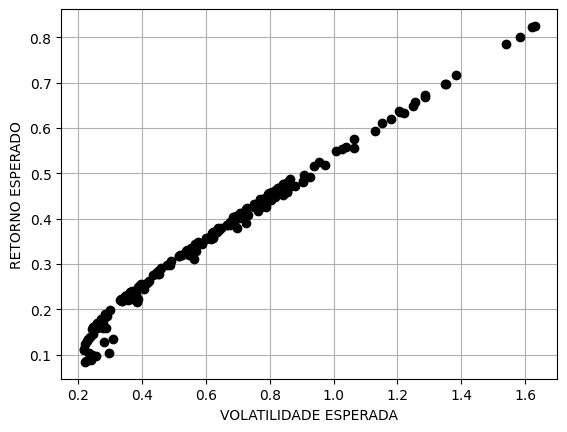

In [21]:
# 9.2 RELAÇÃO RISCO VERSUS RETORNO EM CARTEIRAS DE INVESTIMENTO - Explicação 2
# Otimização de Portfólio

import numpy as np
import pandas as pd
import matplotlib.pyplot as fig
#++++++++++++++++ Nomes dos ativos ++++++++++++++++
ativo = ['A','B','C']
n = len(ativo)

#++++++++++++++++ Construção dos ativos ++++++++++++++++
A =  np.array([4,5,6,5,5,6,7,8,4,3,5])
B = np.array([1,5,10,4,11,7,8,3,1,5,7])
C = np.array([3,4,3,4,5,6,5,3,5,3,4])

#++++++++++++++++ Dataframe dos ativos ++++++++++++++++
df = pd.DataFrame([A,B,C], index = ativo)
prec = df.T      # Transposta para colocar os dados em colunas

#++++++++++++++++ Retorno dos preços ++++++++++++++++
ri = prec/prec.shift(1)-1
mi = ri.mean()   # Retorno médio dos ativos por coluna
sigma = ri.cov() # Covariância da carteira
print(' ')
print(' ')
print('+++++++++ Matriz de covariância da carteira +++++++++ ')
print(sigma)
vet_R = []
vet_Vol = []
for i in range(200):
        #++++++++++ Peso da alocação dos investimentos ++++++++++
        w = np.random.random(n)
        w = w/np.sum(w)
        ############# RETORNO E RISCO DA CARTEIRA #############
        retorno = np.sum(w*mi)
        risco = np.sqrt(np.dot(w.T,np.dot(sigma,w)))
        #######################################################
        vet_R.append(retorno)
        vet_Vol.append(risco)

fig.plot(vet_Vol,vet_R,'ok')
fig.grid()
fig.xlabel('VOLATILIDADE ESPERADA')
fig.ylabel('RETORNO ESPERADO')

## 9.3 OTIMIZAÇÃO DE PORTFÓLIO - FRONTEIRA EFICIENTE - Explicação


 
 
++++++++++ Matriz de covariância da carteira ++++++++++
          dolar      euro     libra
dolar  0.027419  0.024570  0.024475
euro   0.024570  0.028649  0.025931
libra  0.024475  0.025931  0.030845
 
+++++++++++++++++++++++++++++++++++++++++++++++++
Pesos ótimos (w) =  [1. 0. 0.]
+++++++++++++++++++++++++++++++++++++++++++++++++
 
Retorno ótimo esperado =  9.641%
Volatilidade ótimo esperado =  16.137%


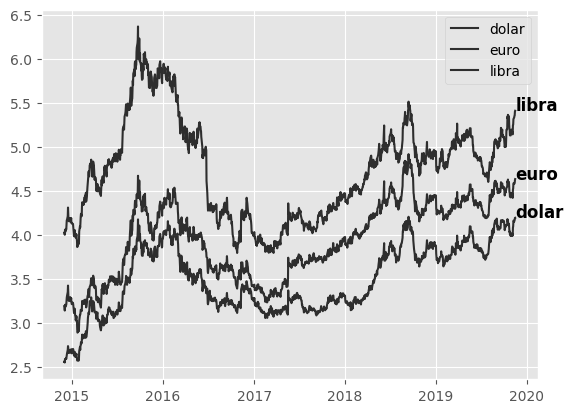

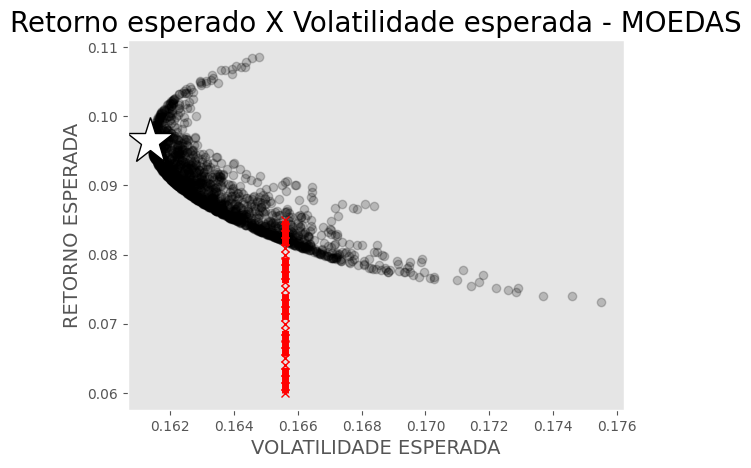

In [23]:
# 9.3 OTIMIZAÇÃO DE PORTFÓLIO - FRONTEIRA EFICIENTE - Explicação

import pandas as pd
import matplotlib.pyplot as fig
import numpy as np
import scipy.optimize as solver

df = pd.read_excel('Portfolio_Moedas.xlsx', sheet_name = 'moedas')

list = ['dolar','euro','libra']

fig.style.use('ggplot')

fig.figure()
ax1 = fig.subplot(111)
ax1.plot(df.data,df[list],'-k',alpha = 0.8)
ax1.legend(list)

for i in range(3):
    ax1.text(x = df.data[-1:], y = df[list[i]][-1:],
             s = list[i], fontsize=12, color = 'k', weight = 'bold')

n = len(df)
#+++++++++++ Exclui a coluna de datas para o cálculo do retorno +++
prec = df.drop(['data'], axis = 1)
#+++++++++++ Retornos dos preços ++++++++++++++++++++++++++++++++++
ri = prec/prec.shift(1)-1
mi = ri.mean().values*252           # Retornos médio dos ativos por colunas
sigma = ri.cov()*252            #Covariância da carteira
print(' ')
print(' ')
print('++++++++++ Matriz de covariância da carteira ++++++++++')
print(sigma)

vet_R = []
vet_Vol = []
for i in range(2000):
    #+++++++++++ Pesos da alocação dos investimentos +++++++++++
    w = np.random.random(len(list))
    w = w/np.sum(w)
    ############### RETORNO E RISCO DA CARTEIRA ###############
    retorno = np.sum(w*mi)
    risco = np.sqrt(np.dot(w.T,np.dot(sigma,w)))
    ###########################################################
    vet_R.append(retorno)
    vet_Vol.append(risco)

fig.figure()
ax2 = fig.subplot(111)
ax2.plot(vet_Vol,vet_R,'ok', alpha = 0.2)
ax2.grid()
ax2.set_xlabel('VOLATILIDADE ESPERADA', fontsize = 14)
ax2.set_ylabel('RETORNO ESPERADA', fontsize = 14)
fig.title('Retorno esperado X Volatilidade esperada - MOEDAS', fontsize = 20)

#++++++++++++++++++ FRONTEIRA EFICIENTE - GRÁFICO ++++++++++++++++++
def f_obj(peso):
    return np.sqrt(np.dot(peso.T, np.dot(sigma,peso)))

x0 = np.array([1.0 / (len(list)) for x in range(len(list))])

bounds = tuple((0, 1) for x in range(len(list)))

faixa_ret = np.arange(0.06, 0.085,  .001)

risk = []

for i in faixa_ret:
    constraints = [{'type':'eq', 'fun': lambda x: np.sum(x) - 1},
                   {'type':'eq', 'fun': lambda x: np.sum(x * mi) - 1}]
    outcome = solver.minimize(f_obj, x0, constraints = constraints, bounds = bounds,
                              method = 'SLSQP')
    risk.append(outcome.fun)

fig.plot(risk, faixa_ret, 'r--x', linewidth = 5)

print(' ')
print('+++++++++++++++++++++++++++++++++++++++++++++++++')
print('Pesos ótimos (w) = ', outcome['x'].round(3))
print('+++++++++++++++++++++++++++++++++++++++++++++++++')
print(' ')

#+++++++++++++++++ PONTO ÓTIMO - MINIMA VOLATILIDADE +++++++++++++++
def estatistica_port(peso):
    peso = np.array(peso)
    ret_ot = np.sum(peso*mi)
    risco_ot = np.sqrt(np.dot(peso.T, np.dot(sigma, peso)))
    return np.array([ret_ot,risco_ot])

for i in faixa_ret:
    constraints = [{'type': 'eq', 'fun': lambda x: sum(x)-1}]
    outcome = solver.minimize(f_obj, x0, constraints = constraints, bounds = bounds,
                              method = 'SLSQP')
    risk.append(outcome.fun)

ret_ot, vol_ot = estatistica_port(outcome['x'])
print('Retorno ótimo esperado = ', str((ret_ot*100).round(3)) + '%')
print('Volatilidade ótimo esperado = ', str((vol_ot*100).round(3)) + '%')
fig.plot(vol_ot, ret_ot, '*', markersize = 35, markerfacecolor = 'w', markeredgecolor = 'black')

##9.4 VALOR EM RISCO (VALUE AT RISK)


TypeError: ignored

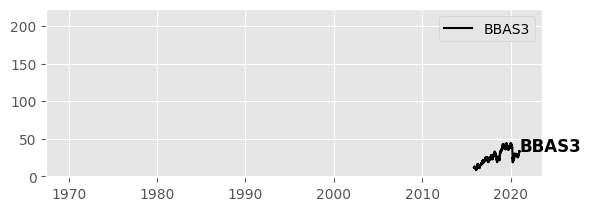

In [24]:
# 9.4 VALOR EM RISCO (VALUE AT RISK)

# Código do livro

import pandas as pd
import matplotlib.pyplot as fig
import numpy as np
from scipy.stats import norm
import math

df = pd.read_excel('BBrasil.xlsx', sheet_name = 'Planilha1')

list = ['BBAS3']
fig.figure()
ax1 = fig.subplot(211)
ax1.plot(df.Date,df[list],'-k',alpha = 1)
ax1.legend(list)

for i in range(1):
    ax1.text(x = df.Date[-1:], y = df[list[i]][-1:],
             s = list[i], fontsize=12, color = 'k', weight = 'bold')

n = len(df)
#+++++++++++ Exclui a coluna de datas para o cálculo do retorno
prec = df.drop(['Date'], axis = 1)
#+++++++++++ Retornos dos preços ++++++++++++++++++++++++++++++
ri = prec/prec.shift(1)-1
mi = ri.mean().values            # Retornos médio dos ativos por colunas
sigma = ri.std()          # Desvio padrão
ax1.plot = fig.plot(212)
ax1.plot(df.Date, ri, '-k', alpha = 1)
print(' ')
print(' ')
print('++++++++++ Desvio padrão do ativo ++++++++++')
print(sigma)

#+++++++++++ Histograma e curva normal do ativo +++++++++++
fig.figure()
ax1 = fig.subplot(111)
ax1.hist(np.asarray(ri, dtype = 'float'), bins = 10, normed = True,
         color = 'black', alpha = 0.4)

xmin, xmax = fig.xlim()
eixox = np.linspace(xmin, xmax, 100)
eixoy = norm.pdf(eixox, mi, sigma)
ax1.plot(eixox, eixoy, '--k', linewidth = 3)

#+++++++++++ Var e área abaixo da normal +++++++++++
z = norm.ppf(0.05)
VaR = float(mi+z*sigma)
Ix = np.linspace(xmin,VaR,100)
Iy = norm.pdf(Ix, mi, sigma)
ax1.fill_between(Ix,Iy, color = 'k')
ax1.text(xmin + 0.12,3,'5% de risco', fontsize = 14, weight = 'bold')
#++++++++++++++++++++++++ VaR Monetário (R$) ++++++++++++++++++++++++

dias = 1 # dias que deseja manter o ativo no futuro
VaR_Mon = VaR*float(prec[-1:].values)* math.sqtr(dias)

print(' ')
print('++++++++++++ VaR do ativo ++++++++++++')
print('Dias na posição futura = ', dias)
print('Última posição = ', float(prec[-1:].values))
print('VaR ( 5% ) = ', str(round(100*VaR,3)) + ' %')
print('VaR Monetário por ação = ', round(VaR_Mon,3))
print('++++++++++++++++++++++++++++++++++++++++++')

Desvio padrão do ativo:
[0.02990119]
VaR do ativo:
Dias na posição futura = 1
Última posição = 33.25
VaR (5%) = -4.792%
VaR Monetário por ação = -1.593


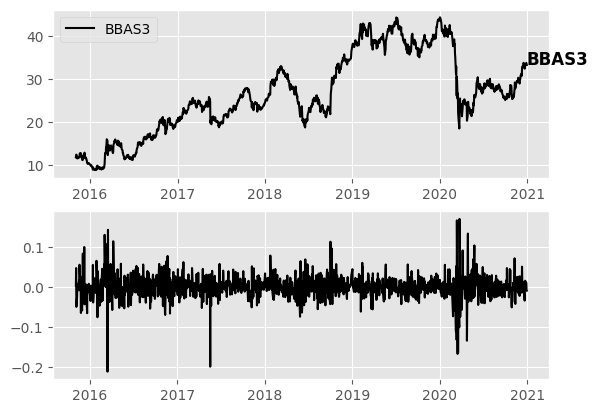

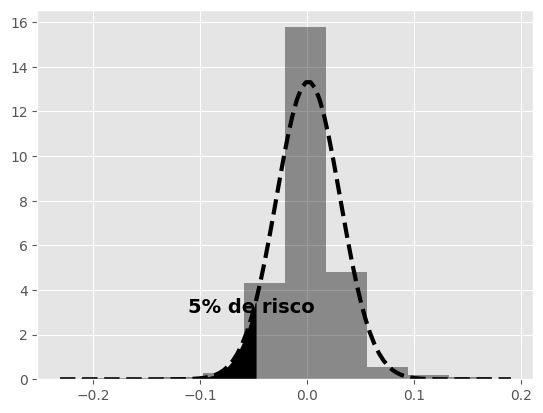

In [25]:
# Código corrigido
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import math

df = pd.read_excel('BBrasil.xlsx', sheet_name='Planilha1')

asset_list = ['BBAS3']
fig, ax1 = plt.subplots(2, 1)
ax1[0].plot(df.Date, df[asset_list], '-k', alpha=1)
ax1[0].legend(asset_list)

for asset in asset_list:
    ax1[0].text(x=df.Date.iloc[-1], y=df[asset].iloc[-1],
                s=asset, fontsize=12, color='k', weight='bold')

n = len(df)

prices = df.drop(['Date'], axis=1)
returns = prices / prices.shift(1) - 1
mean_returns = returns.mean().values
std_dev = returns.std().values

ax1[1].plot(df.Date, returns, '-k', alpha=1)

print('Desvio padrão do ativo:')
print(std_dev)

fig, ax2 = plt.subplots()
ax2.hist(np.asarray(returns, dtype='float'), bins=10, density=True, color='black', alpha=0.4)

xmin, xmax = plt.xlim()
x_axis = np.linspace(xmin, xmax, 100)
y_axis = norm.pdf(x_axis, mean_returns, std_dev)
ax2.plot(x_axis, y_axis, '--k', linewidth=3)

z = norm.ppf(0.05)
VaR = float(mean_returns + z * std_dev)
Ix = np.linspace(xmin, VaR, 100)
Iy = norm.pdf(Ix, mean_returns, std_dev)
ax2.fill_between(Ix, Iy, color='k')
ax2.text(xmin + 0.12, 3, '5% de risco', fontsize=14, weight='bold')

dias = 1
VaR_Mon = VaR * float(prices[-1:].values) * math.sqrt(dias)

print('VaR do ativo:')
print('Dias na posição futura =', dias)
print('Última posição =', float(prices[-1:].values))
print('VaR (5%) =', str(round(100 * VaR, 3)) + '%')
print('VaR Monetário por ação =', round(VaR_Mon, 3))

##9.6 SIMULAÇÃO ESTOCÁSTICA - Explicação 1

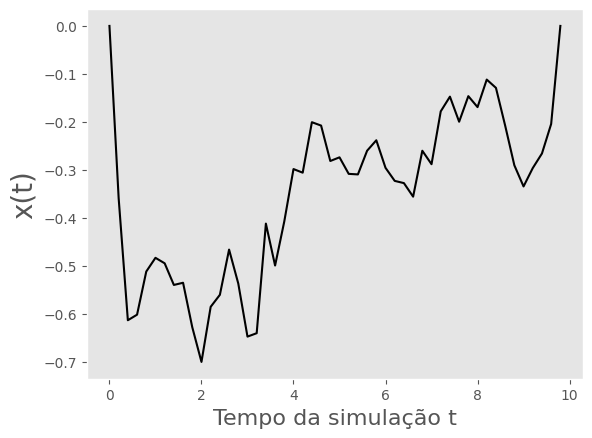

In [26]:
# 9.6 SIMULAÇÃO ESTOCÁSTICA - Explicação 1

# Modelo 1
#+++++++++++++++++++++++++++++++++++++++++++++
#      dx = -x/(1+t) dt + 1/(1+t) dw
#+++++++++++++++++++++++++++++++++++++++++++++

import numpy as np
import matplotlib.pyplot as fig
#+++++++++++++++++++ Condições iniciais do modelo ++++++++++++++++++++
T=10                    # --------> tempo final
N=50                    # --------> numero de pontos
dt=T/N                  # --------> passo de simulação

t=np.arange(0,T,dt)     # --------> vetor tempo para o modelo
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Xzeros=0                # --------> condição inicial

#+++++++++++++++++++ Geração dos deltas estocasticos +++++++++++++++++
dW=np.sqrt(dt)*np.random.randn(N)
W=np.cumsum(dW)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
R=1
Dt=R*dt                 # --------> delta de integração no tempo
L=int(N/R)
Xem=np.zeros(L)         # --------> inicialização do vetor solução
Xtemp=Xzeros

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
for j in range(1,L-1):
    Winc=np.sum(dW[ R*(j-1) : R*j ])
    Xtemp=Xtemp+(-1/(1+t[j]))*Xtemp*Dt+(1/(1+t[j]))*Winc  # MODELO ESTOCASTICO
    Xem[j]=Xtemp

#++++++++++++++++ Gráfico da solução +++++++++++++++++++++++++++++++++
fig.plot(t,Xem,'-k')
fig.xlabel('Tempo da simulação t',fontsize=16)
fig.ylabel('x(t)',fontsize=20)
fig.grid()

##9.6 SIMULAÇÃO ESTOCÁSTICA - Explicação 2

<ipython-input-27-77c7f1343bb9>:30: RuntimeWarning: invalid value encountered in sqrt
  Xtemp=Xtemp+0.25*(1-np.sqrt(Xtemp))*Dt+np.sqrt(Xtemp)*Winc  # MODELO ESTOCASTICO


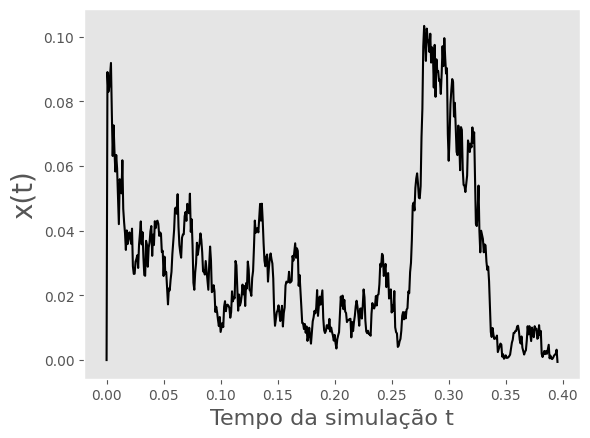

In [27]:
# 9.6 SIMULAÇÃO ESTOCÁSTICA - Explicação 2

# Modelo 2
#+++++++++++++++++++++++++++++++++++++++++++++
#      dx = 1-sqrt(x)/4 dt + sqrt(x) dw
#+++++++++++++++++++++++++++++++++++++++++++++

import numpy as np
import matplotlib.pyplot as fig
#+++++++++++++++++++ Condições iniciais do modelo ++++++++++++++++++++
T=1                    # --------> tempo final
N=1300                    # --------> numero de pontos
dt=T/N                  # --------> passo de simulação
t=np.arange(0,T,dt)     # --------> vetor tempo para o modelo
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Xzeros=0.1                # --------> condição inicial

#+++++++++++++++++++ Geração dos deltas estocasticos +++++++++++++++++
dW=np.sqrt(dt)*np.random.randn(N)
W=np.cumsum(dW)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
R=1
Dt=R*dt                 # --------> delta de integração no tempo
L=int(N/R)
Xem=np.zeros(L)         # --------> inicialização do vetor solução
Xtemp=Xzeros
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
for j in range(1,L):
    Winc=np.sum(dW[ R*(j-1) : R*j ])
    Xtemp=Xtemp+0.25*(1-np.sqrt(Xtemp))*Dt+np.sqrt(Xtemp)*Winc  # MODELO ESTOCASTICO
    Xem[j]=Xtemp
#++++++++++++++++ Gráfico da solução +++++++++++++++++++++++++++++++++
fig.plot(t,Xem,'-k')
fig.xlabel('Tempo da simulação t',fontsize=16)
fig.ylabel('x(t)',fontsize=20)
fig.grid()

##9.7 OPÇÕES E BLACK-SCHOLES

In [28]:
# 9.7 OPÇÕES E BLACK-SCHOLES

import pandas as pd
import numpy as np

df=pd.read_excel('OpçaoPETRL.xlsx',sheet_name='Opçao',columns=['Data','PETR4','PETRL299'])
#+++++++++++++++++++++++ Gráfico da opçao e ação +++++++++++++++++++++++
ax1=df.plotscatter(x='PETR4',y='PETRL299',c='black',s=40)

#+++++++++++++++++++++++ Gráfico da reta teorica da Opção ++++++++++++++
x=np.linspace(18,28.81,20)
y=np.zeros(20)
z=np.linspace(28.81,32,20)
fz=z-28.81
#+++++++++++++++++++++ Transforma a reta em lista
x=x.tolist()
y=y.tolist()
z=z.tolist()
fz=fz.tolist()
#+++++++++ Transforma a lista em Dataframe para adicionar o gráfico
r={'x':x,'y':y,'z':z,'fz':fz}
reta=pd.Dataframe(r,columns=['x','y','z','fz'])
reta.plot.line(x='x',y='y',c='black',ax=ax1,linewidth=8)
reta.plot.line(x='z',y='fz',c='black',ax=ax1,linewidth=5)
ax1.set_xlim(18,34)
ax1.set_ylim(0,5)
ax1.set_xlael('PETR4',fontsize=16)
ax1.set_ylael('PETR299',fontsize=16)
ax1.grid()
ax1.get_legend().remove()
#++++++++++++++++ Gráfico Ação x Opção +++++++++++++++++++++++++++++++++
ax2=df.plot(x='Data',y='PETR4',c='black')
ax3=df.plot(x='Data',y='PETRl299',ax=ax2,secondary_y=True,c='black',style='-o',linewidth=3)

##9.8 - VOLATILIDADE IMPLÍCITA

In [29]:
# 9.8 - VOLATILIDADE IMPLÍCITA
#+++++++++++++++++++++++++++++++++++++++++++++++++++
import numpy as np
import math
from scipy import stats

#+++++++++++++++++++++ Function para a call ++++++++++++++++++++++++
def call(S,K,T,r,sigma):
    d1=(math.log(S/K)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    c_t = S*stats.norm.cdf(d1)-K*math.exp(-r*T)*stats.norm.cdf(d2)
    return c_t,d1
#++++++++++++++++++++++++++ Programa principal +++++++++++++++++++++
S=40
K=42
T=0.5
r=0.015
sigma=0.2
c0=1.6
#+++++ Newton raphson para calcular a volatilidade implicíta +++++++
tol=1e-3
delta=1
cont=0
max_it=100
vol=0.5
while delta>tol:
    cont=cont+1
    if cont>=max_it:
        print('Máximo de interações')
        break;
    vol_anterior=vol
    c,d1 = call(S,K,T,r,vol)
    funcao=c-c0
    vega = S*stats.norm.pdf(d1)*np.sqrt(T)
    vol=vol-funcao/vega
    delta=abs((vol-vol_anterior)/vol_anterior)

print('+++++++++++++ Preço da call +++++++++++++')
print('Preço call = ',round(c,3))
print('Volatilidade = ',round(vol,3))
print('Interações = ',cont)

+++++++++++++ Preço da call +++++++++++++
Preço call =  1.6
Volatilidade =  0.204
Interações =  3


#Exemplos

##Exemplo  9.1

 
 
++++++++++ Matriz de covariância da carteira ++++++++++
          PETR4     VALE3     USIM5     GGBR4     BBAS3     BBDC4     ITUB4  \
PETR4  0.258446  0.107677  0.147803  0.112915  0.142754  0.100136  0.090469   
VALE3  0.107677  0.240003  0.140112  0.141291  0.068289  0.052804  0.048045   
USIM5  0.147803  0.140112  0.401489  0.191149  0.128533  0.088728  0.079275   
GGBR4  0.112915  0.141291  0.191149  0.233899  0.093073  0.071208  0.064098   
BBAS3  0.142754  0.068289  0.128533  0.093073  0.197338  0.112376  0.102263   
BBDC4  0.100136  0.052804  0.088728  0.071208  0.112376  0.107256  0.087292   
ITUB4  0.090469  0.048045  0.079275  0.064098  0.102263  0.087292  0.091881   
ELET6  0.102052  0.040086  0.099487  0.069574  0.106574  0.073736  0.066607   
EMBR3  0.023830  0.031812  0.012581  0.027387  0.014530  0.015340  0.017411   
MGLU3  0.078871  0.058123  0.098797  0.072649  0.091015  0.061107  0.054698   

          ELET6     EMBR3     MGLU3  
PETR4  0.102052  0.023830  0.078

Text(0.5, 1.0, 'Retorno esperado X Volatilidade esperada ativos a Bovespa')

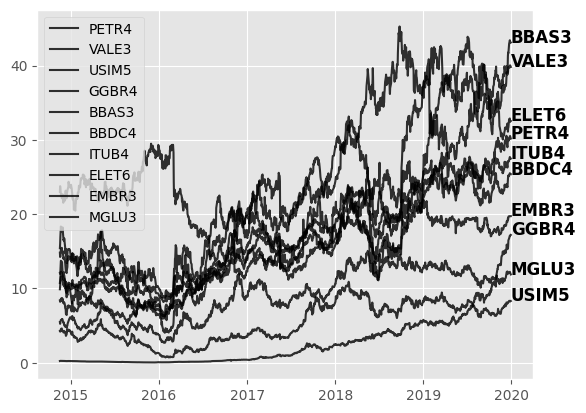

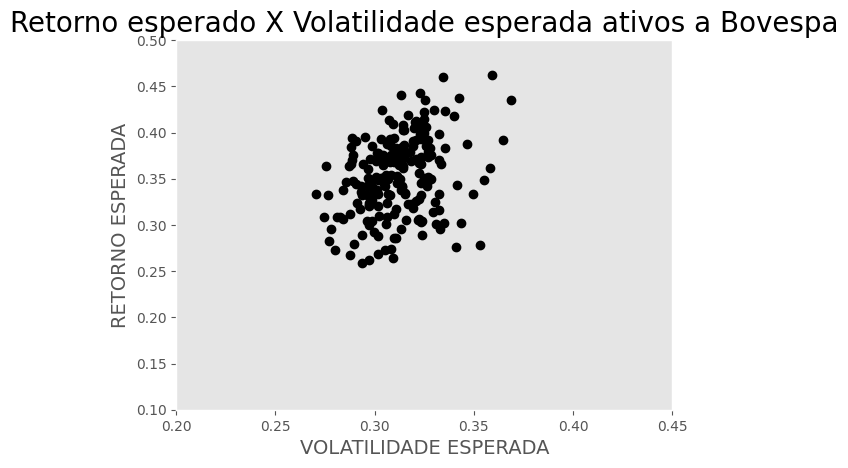

In [32]:
# Exemplo  9.1

import pandas as pd
import matplotlib.pyplot as fig
import numpy as np

df = pd.read_excel('Portfolio_Bov.xlsx', sheet_name = 'BOV')

list = ['PETR4','VALE3','USIM5','GGBR4','BBAS3','BBDC4','ITUB4','ELET6','EMBR3','MGLU3']
fig.figure()
ax1 = fig.subplot(111)
ax1.plot(df.Date,df[list],'-k',alpha = 0.8)
ax1.legend(list)

for i in range(10):
    ax1.text(x = df.Date[-1:], y = df[list[i]][-1:],
             s = list[i], fontsize=12, color = 'k', weight = 'bold')

n = len(df)
#+++++++++++ Exclui a coluna de datas para o cálculo do retorno
prec = df.drop(['Date'], axis = 1)
#+++++++++++ Retornos dos preços ++++++++++++++++++++++++++++++
ri = prec/prec.shift(1)-1
mi = ri.mean().values*252           # Retornos médio dos ativos por colunas
sigma = ri.cov()*252            #Covariância da carteira
print(' ')
print(' ')
print('++++++++++ Matriz de covariância da carteira ++++++++++')
print(sigma)

vet_R = []
vet_Vol = []
for i in range(200):
    #+++++++++++ Pesos da alocação dos investimentos +++++++++++
    w = np.random.random(len(list))
    w = w/np.sum(w)
    ############### RETORNO E RISCO DA CARTEIRA ###############
    retorno = np.sum(w*mi)
    risco = np.sqrt(np.dot(w.T,np.dot(sigma,w)))
    ###########################################################
    vet_R.append(retorno)
    vet_Vol.append(risco)
fig.figure()
ax2 = fig.subplot(111)
ax2.plot(vet_Vol,vet_R,'ok')
ax2.set_xlim(0.2,0.45)
ax2.set_ylim(0.1,0.5)
ax2.grid()
ax2.set_xlabel('VOLATILIDADE ESPERADA', fontsize = 14)
ax2.set_ylabel('RETORNO ESPERADA', fontsize = 14)
fig.title('Retorno esperado X Volatilidade esperada ativos a Bovespa', fontsize = 20)

##Exemplo 9.2

 
 
++++++++++ Matriz de covariância da carteira ++++++++++
          dolar      euro     libra
dolar  0.027419  0.024570  0.024475
euro   0.024570  0.028649  0.025931
libra  0.024475  0.025931  0.030845


Text(0.5, 1.0, 'Retorno esperado X Volatilidade esperada - MOEDAS')

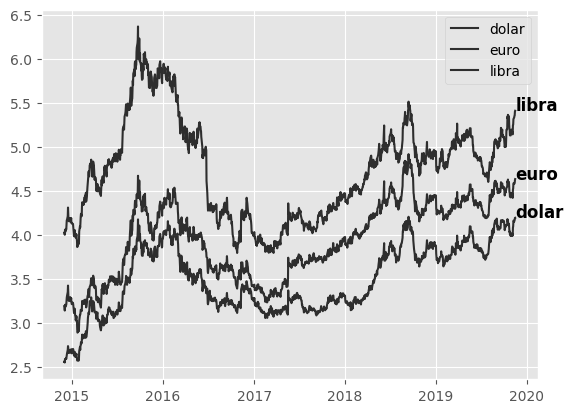

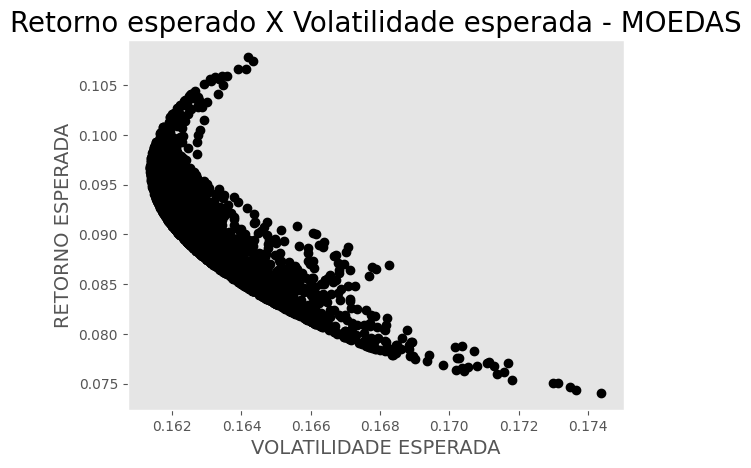

In [33]:
# Exemplo  9.2

import pandas as pd
import matplotlib.pyplot as fig
import numpy as np

df = pd.read_excel('Portfolio_Moedas.xlsx', sheet_name = 'moedas')

list = ['dolar','euro','libra']

fig.style.use('ggplot')

fig.figure()
ax1 = fig.subplot(111)
ax1.plot(df.data,df[list],'-k',alpha = 0.8)
ax1.legend(list)

for i in range(3):
    ax1.text(x = df.data[-1:], y = df[list[i]][-1:],
             s = list[i], fontsize=12, color = 'k', weight = 'bold')

n = len(df)
#+++++++++++ Exclui a coluna de datas para o cálculo do retorno
prec = df.drop(['data'], axis = 1)
#+++++++++++ Retornos dos preços ++++++++++++++++++++++++++++++
ri = prec/prec.shift(1)-1
mi = ri.mean().values*252           # Retornos médio dos ativos por colunas
sigma = ri.cov()*252            #Covariância da carteira
print(' ')
print(' ')
print('++++++++++ Matriz de covariância da carteira ++++++++++')
print(sigma)

vet_R = []
vet_Vol = []
for i in range(2000):
    #+++++++++++ Pesos da alocação dos investimentos +++++++++++
    w = np.random.random(len(list))
    w = w/np.sum(w)
    ############### RETORNO E RISCO DA CARTEIRA ###############
    retorno = np.sum(w*mi)
    risco = np.sqrt(np.dot(w.T,np.dot(sigma,w)))
    ###########################################################
    vet_R.append(retorno)
    vet_Vol.append(risco)

fig.figure()
ax2 = fig.subplot(111)
ax2.plot(vet_Vol,vet_R,'ok')
ax2.grid()
ax2.set_xlabel('VOLATILIDADE ESPERADA', fontsize = 14)
ax2.set_ylabel('RETORNO ESPERADA', fontsize = 14)
fig.title('Retorno esperado X Volatilidade esperada - MOEDAS', fontsize = 20)

##Exemplo 9.3

 
+++++++++++++ RESULTADO DA SIMULAÇÃO DE MONTE CARLO +++++++++++++
RETORNO MÉDIO REAL =  0.1660321796404788
RETORNO MÉDIO SIMULADO =  0.12739770461057792
VOLATILIDADE REAL =  3.575515581168774
VOLATILIDADE SIMULADO =  3.5986825141801115


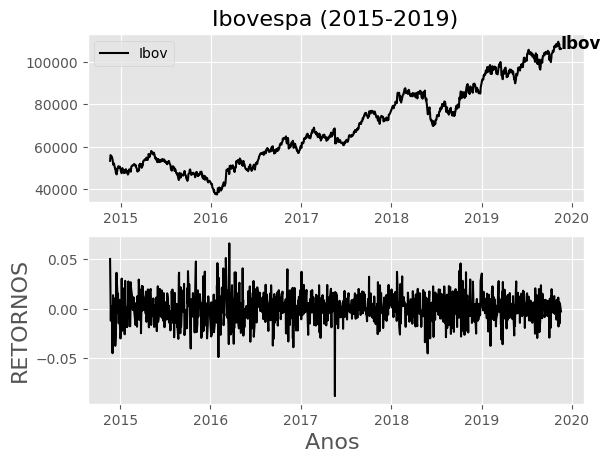

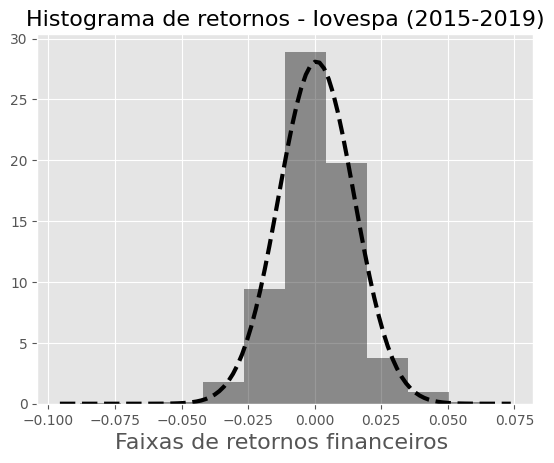

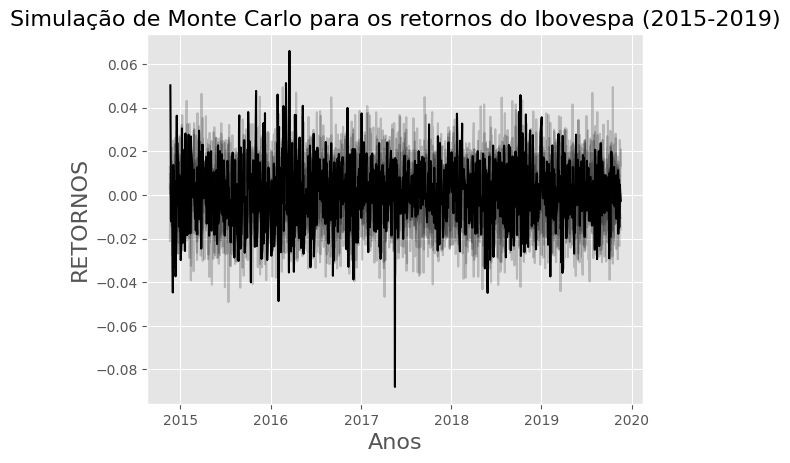

In [34]:
# Exemplo  9.3

import pandas as pd
import matplotlib.pyplot as fig
import numpy as np
from scipy.stats import norm

df = pd.read_excel('Ibovespa.xlsx', sheet_name='IBV')

list = ['Ibov']
fig.figure()
ax1 = fig.subplot(211)
ax1.plot(df.Date, df[list], '-k', alpha=1)
fig.title('Ibovespa (2015-2019)', fontsize = 16)
ax1.legend(list)

for i in range(1):
        ax1.text(x = df.Date[-1:], y = df[list[i]][-1:],
                 s = list[i], fontsize = 12, color = 'k', weight = 'bold')
n = len(df)
#++++++++++++++ Exclui a coluna de datas para o cálculo do retorno ++++
prec = df.drop(['Date'], axis = 1)
#++++++++++++ Retornos dos preços +++++++++++++++++++++++++++++++++++++
ri = prec/prec.shift(1)-1
mi = ri.mean().values           # Retorno médio dos ativos por colunas
sigma = ri.std()            # Desvio padrão
ax1 = fig.subplot(212)
ax1.plot(df.Date, ri,'-k', alpha = 1)
fig.xlabel('Anos ', fontsize = 16)
fig.ylabel('RETORNOS', fontsize = 16)

#++++++++++++ Histograma e curva normal do ativo +++++++++++++++++++++
fig.figure()
ax1 = fig.subplot(111)
ax1.hist(np.asarray(ri,dtype = 'float'), bins=10, density=True,
         color='black',alpha=0.4)

xmin,xmax=fig.xlim()
eixox=np.linspace(xmin,xmax,100)
eixoy=norm.pdf(eixox,mi,sigma)
ax1.plot(eixox,eixoy,'--k',linewidth=3)
fig.xlabel('Faixas de retornos financeiros ',fontsize=16)
fig.title('Histograma de retornos - Iovespa (2015-2019)',fontsize=16)

#++++++++++++++++ Simulação de monte carlo +++++++++++++++++++++++++++
x=np.zeros((n,5))
for j in range(5):
    for i in range(n):
        x[i,j]=np.random.normal(mi,sigma)

fig.figure()
fig.plot(df.Date,ri,'-k')
fig.plot(df.Date,x,'-k',alpha=0.2)
fig.xlabel('Anos',fontsize=16)
fig.ylabel('RETORNOS',fontsize=16)
fig.title('Simulação de Monte Carlo para os retornos do Ibovespa (2015-2019)',
          fontsize=16)
print(' ')
print('+++++++++++++ RESULTADO DA SIMULAÇÃO DE MONTE CARLO +++++++++++++')
print('RETORNO MÉDIO REAL = ',float(mi)*252)
print('RETORNO MÉDIO SIMULADO = ',x.mean()*252)
print('VOLATILIDADE REAL = ',float(sigma)*252)
print('VOLATILIDADE SIMULADO = ',x.std()*252)

##Exemplo 9.4

+++++++++ Coeficientes tendência linear y = b + ax ++++++++
a =  49.84713153327875   b =  38578.78687787624
 
++++++++++++ RESULTADO DA SIMULAÇÃO DE MONTE CARLO +++++++++++
MÉDIA REAL (detrends) =  -2.641514595748926e-12
MÉDIA DA SIMULAÇÃO (detrends) =  106263.3367181386
VOLATILIDADE REAL (desvio padrão dos detrends passados) =  6190.4486814456895
VOLATILIDADE da SIMULAÇÃO (desvio padrão dos detrends futuros) =  559.8853040114886
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


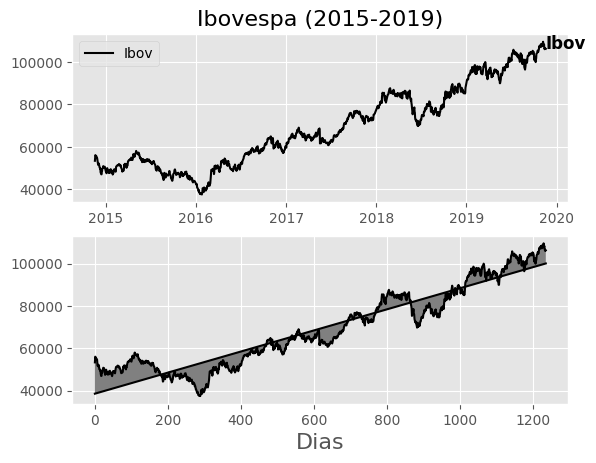

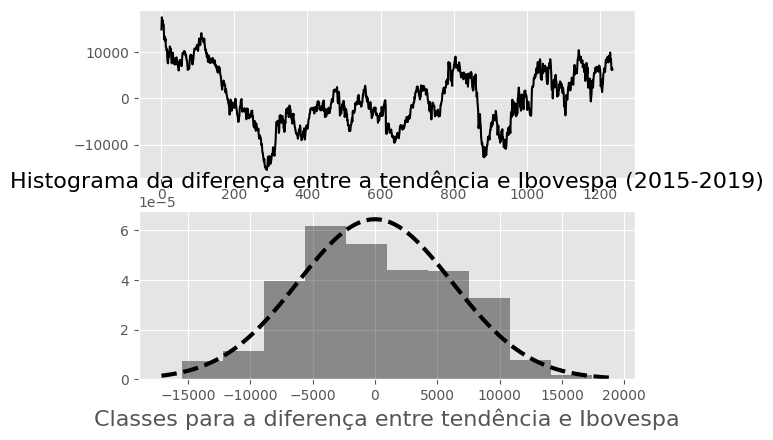

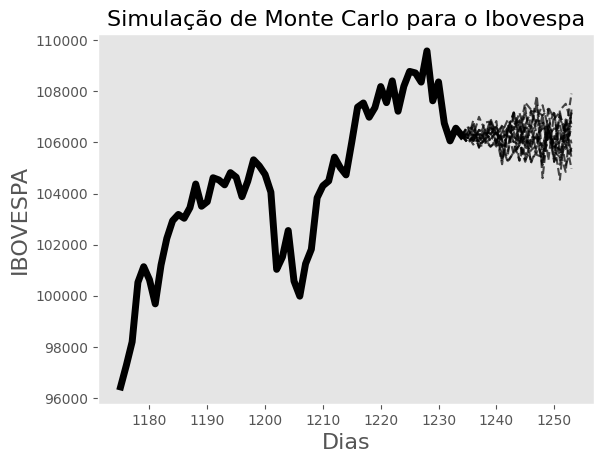

In [35]:
# Exemplo  9.4
# Simulação de Monte Carlo para tendencias

import pandas as pd
import matplotlib.pyplot as fig
import numpy as np
import matplotlib.mlab as m
from scipy.stats import norm
df=pd.read_excel('Ibovespa.xlsx',sheet_name='IBV')

list=['Ibov']
fig.figure()
ax1=fig.subplot(211)
ax1.plot(df.Date,df[list],'-k',alpha=1)
fig.title('Ibovespa (2015-2019)',fontsize=16)
ax1.legend(list)

for i in range(1):
    ax1.text(x=df.Date[-1:],y=df[list[i]][-1:],
             s=list[i],fontsize=12,color='k',weight='bold')
n=len(df)
#+++++++++++ Exclui a coluna de datas para o cálculo do retorno +++++++
x=np.linspace(1,n,n)
coef=np.polyfit(x,df['Ibov'],1)
tendencia=coef[1]+coef[0]*x

print('+++++++++ Coeficientes tendência linear y = b + ax ++++++++')
print('a = ', coef[0],'  b = ',coef[1])

ax1=fig.subplot(212)
ax1.plot(x,df['Ibov'],'-k',x,tendencia,'-k')
ax1.fill_between(x,df['Ibov'], tendencia, facecolor='grey')
fig.xlabel('Dias',fontsize=16)

fig.figure()
ax1=fig.subplot(211)
filtro=m.detrend_linear(df['Ibov'])
mi=filtro.mean()
sigma=filtro.std()
ax1.plot(x,filtro,'-k')

ax1=fig.subplot(212)
ax1.hist(np.asarray(filtro,dtype='float'), bins=10,density=True,
         color='black',alpha=0.4)
fig.title('Histograma da diferença entre a tendência e Ibovespa (2015-2019)',fontsize=16)
xmin,xmax=fig.xlim()
eixox=np.linspace(xmin,xmax,100)
eixoy=norm.pdf(eixox,mi,sigma)
ax1.plot(eixox,eixoy,'--k',linewidth=3)
fig.xlabel('Classes para a diferença entre tendência e Ibovespa',fontsize=16)

#+++++++++++++++++++++++++ Simulação de monte carlo ++++++++++++++++++++
num = 15
dias = 20
aleat = np.zeros((dias,num))
simul = np.zeros((dias,num))
eixo =  np.zeros((dias,num))
for j in range(num):
    for i in range(dias):
        eixo[i,0]=n+i
        aleat[i,j]=np.random.normal(mi,sigma/np.sqrt(n))*np.sqrt(i)
        simul[i,j]=df['Ibov'][-1:]+aleat[i,j]

fig.figure()
fig.plot(x[-60:],df['Ibov'][-60:],'-k',linewidth=5)
fig.plot(eixo[:,0],simul,'--k',alpha=0.7)
fig.xlabel('Dias',fontsize=16)
fig.ylabel('IBOVESPA',fontsize=16)
fig.grid()
fig.title('Simulação de Monte Carlo para o Ibovespa',
          fontsize=16)

print(' ')
print('++++++++++++ RESULTADO DA SIMULAÇÃO DE MONTE CARLO +++++++++++')
print('MÉDIA REAL (detrends) = ',float(mi))
print('MÉDIA DA SIMULAÇÃO (detrends) = ',simul.mean())
print('VOLATILIDADE REAL (desvio padrão dos detrends passados) = ', float(sigma))
print('VOLATILIDADE da SIMULAÇÃO (desvio padrão dos detrends futuros) = ',simul.std())
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

##Exemplo 9.5

Text(0.5, 1.0, 'CRASH 2008 - Ibovespa x Simulação Estocástica')

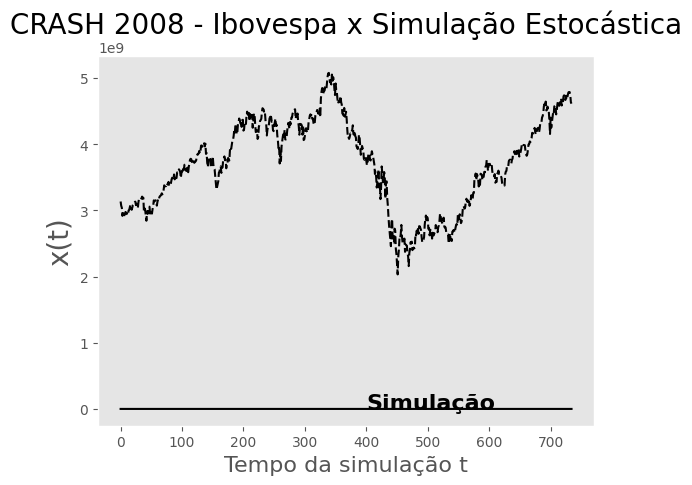

In [36]:
# Exemplo  9.5
# Modelo 3 (Ibovespa)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#      dx = theta1*(1-sqrt(x) dt + theta2*sqrt(x) dw)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
import numpy as np
import matplotlib.pyplot as fig
import pandas as pd
df=pd.read_excel('Bov2008.xlsx',sheet_name='Planilha1')

#++++++++++++++++++++++ Condições iniciais do modelo +++++++++++++++++
T=len(df['Ibov'])                #-------> tempo final
N=len(df['Ibov'])                #-------> numero de pontos
dt=T/N                           #-------> passo de simulação
t=np.arange(0,T,dt)              #-------> vetor tempo para o modelo
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Xzero=0.48                       #-------> condição inicial
u1=0.0068;
u2=0.0192;
#+++++++++++++++++ Geração dos deltas estocasticos +++++++++++++++++
np.random.seed(2)
dW=np.sqrt(dt)*np.random.randn(N)
W=np.cumsum(dW)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
R=1
Dt=R*dt
L=int(N/R)
Xem=np.zeros(L)
Xtemp=Xzero
#++++++++++++++++ Resolução numerica do modelo estocastico +++++++++
for j in range(L):
    Winc=np.sum(dW[R*(j-1):R*j])
    Xtemp=Xtemp+u1*(1-np.sqrt(Xtemp))*Dt+u2*np.sqrt(Xtemp)*Winc  #MODELO ESTOCASTICO
    Xem[j]=Xtemp
#+++++++++++++++++++++ Gráfico da solução ++++++++++++++++++++++++++
fig.figure()
ax1=fig.subplot(111)
ax1.plot(t,Xem*69052,'-k',t,df['Ibov']*69052,'--k')
ax1.text(x=t[400],y=Xem[400]*69052,s='Simulação',fontsize=16,color='k',weight='bold')
ax1.set_xlabel('Tempo da simulação t', fontsize=16)
ax1.set_ylabel('x(t)',fontsize = 20)
fig.grid()
fig.title('CRASH 2008 - Ibovespa x Simulação Estocástica', fontsize=20)

##Exemplo 9.6

In [39]:
# Exemplo 9.6 - Explicação 1
# Opção de Compra
#+++++++++++++++++++++++++++++++++++++++++++++++++++
import numpy as np
import math
from scipy import stats

#+++++++++++++++++++++ Function para a call ++++++++++++++++++++++++
def call(S,K,T,r,sigma):
    d1=(math.log(S/K)+(r+sigma**2/2)/(sigma*np.sqrt(T)))
    d2=d1-sigma*np.sqrt(T)
    c_t = S*stats.norm.cdf(d1)-K*math.exp(-r*T)*stats.norm.cdf(d2)
    return c_t
#++++++++++++++++++++++++++ Programa principal +++++++++++++++++++++
c=call(40,42,0.5,0.015,0.2)
print(' ')
print('+++++++++++++ Preço da call +++++++++++++')
print('Call = ', round(c,3))

 
+++++++++++++ Preço da call +++++++++++++
Call =  1.355


-0.22125487268645735 -0.3626762289237669
 
+++++++++++++ Preço da call +++++++++++++
Call =  1.557


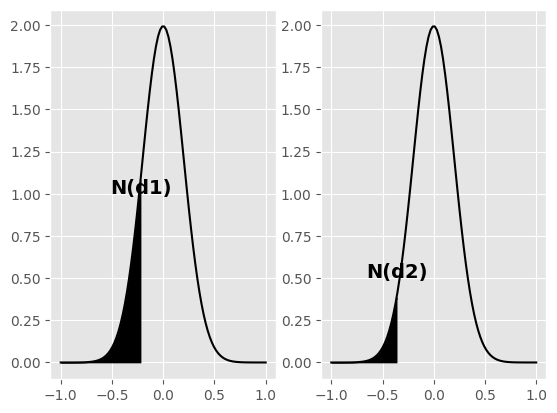

In [38]:
# Exemplo 9.6 - Explicação 2
# Opção de Compra
#+++++++++++++++++++++++++++++++++++++++++++++++++++
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as fig
#+++++++++++++++++++++ Function para a call ++++++++++++++++++++++++
def call(S,K,T,r,sigma):
    d1=(math.log(S/K)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    #+++++++++ Gráfico da area de d1 e d2 na normal ++++++++++++++++
    Ix1=np.linspace(-1,d1,100)
    Ix2=np.linspace(-1,d2,100)
    Iy1=stats.norm.pdf(Ix1,0,sigma)
    Iy2=stats.norm.pdf(Ix2,0,sigma)
    eixox=np.linspace(-1,1,100)
    eixoy=stats.norm.pdf(eixox,0,sigma)
    fig.figure()
    ax1=fig.subplot(121)
    ax1.plot(eixox,eixoy,'-k')
    ax1.fill_between(Ix1,Iy1,color='k')
    ax1.text(d1-0.3,1,'N(d1)',fontsize=14,weight='bold')
    ax2=fig.subplot(122)
    ax2.plot(eixox,eixoy,'-k')
    ax2.fill_between(Ix2,Iy2,color='k')
    ax2.text(d2-0.3,0.5,'N(d2)',fontsize=14,weight='bold')
    #+++++++++++++ Cálculo do preço da call ++++++++++++++++++++++++
    c_t = S*stats.norm.cdf(d1)-K*math.exp(-r*T)*stats.norm.cdf(d2)
    print(d1,d2)
    return c_t
#++++++++++++++++++++++++++ Programa principal++++++++++++++++++++++++
c=call(40,42,0.5,0.015,0.2)
print(' ')
print('+++++++++++++ Preço da call +++++++++++++')
print('Call = ', round(c,3))

##Exemplo 9.7

In [40]:
# Exemplo 9.7
# Não consegui juntar os dados de cotações do exercicio
# Opção de Compra
#+++++++++++++++++++++++++++++++++++++++++++++++++++
import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as fig
#+++++++++++++++++++++ Function para a call ++++++++++++++++++++++++
def call(S,K,T,r,sigma):
    d1=(math.log(S/K)+(r+sigma**2/2)/(sigma*np.sqrt(T)))
    d2=d1-sigma*np.sqrt(T)
    c_t = S*stats.norm.cdf(d1)-K*math.exp(-r*T)*stats.norm.cdf(d2)
    return c_t

df=pd.read_excel('OpçaoPETRL.xlsx',sheet_name='Opçao',columns=['Data','PETR4','PETRL299'])
n=len(df)
#++++++++++++++++++ Exclui a coluna de datas para o cálculo do retorno +++++
prec=df['PETR4']
#++++++++++++++++++ Retornos dos preços ++++++++++++++++++++++++++++++++++++
ri = prec/prec.shift(1)-1
mi=ri.mean()                   # Retorno médio dos ativos por colunas
sigma=ri.std()                 # desvio padrão anualizado

ax1=fig.suplot(111)
ax1.plot(df.Data,ri,'-k',alpha=1)
fig.xlabel('Dias',fontsize=16)
fig.ylabel('RETORNOS',fontsize=16)
fig.grid()

#++++++++++++++++++ VALORES DE ENTRADA PARA CALL +++++++++++++++++++++++++++
S=float(df['PETR4'][-1:].values)      # Último preço da ação
K=28.1                                # Preço de Exercício (strike)
T=21/252                              # 21 dias úteis para o vencimento
r=0.05                                # taxa selic
#++++++++++++++++++++ calculo do preço da call +++++++++++++++++++++++++++++
c=call(S,K,T,r,sigma)
print(' ')
print('+++++++++++++ Preço da call +++++++++++++')
print('Call = ', round(c,3))

##Exemplo 9.8

In [ ]:
# Exemplo 9.8
# Volatilidade Implícita PETRL299 da PETR4
# Não consegui juntar os dado de cotação
import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as fig

def call(S,K,T,r,sigma):
    d1=(math.log(S/K)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    c_t = S*stats.norm.cdf(d1)-K*math.exp(-r*T)*stats.norm.cdf(d2)
    return c_t,d1

df=pd.read_excel('OpcaoPETRL.xlsx',sheet_name='Opcao',columns=['Data','PETR4','PETRL299'])
n=len(df)
#+++++++++++++++++ Exclui a coluna de datas para o cálculo do retorno
prec=df['PETR4']
#+++++++++++++++++ Retornos dos preços +++++++++++++++++++++++++++++++
ri=prec/prec.shift(1)-1
mi=ri.mean()                # Retorno médio dos ativos por colunas
sigma=ri.std()              # Desvio padrão anualizado

ax1=fig.subplot(111)
ax1.plot(df.Data,ri,'-k',alpha=1)
fig.xlabel('Dias',fontsize=16)
fig.ylabel('RETORNOS',fontsize=16)
fig.grid()

#++++++++++++++++ VALORES DE ENTRADA PARA CALL ++++++++++++++++++++++++
S=float(df['PETR4'][-1:].values)   # Último preço da ação
K=28.1                             # Preço de Exercício (strikes)
T=21/252                           # 21 dias úteis para o vencimento
r=0.05                             # Taxa selic
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
c0=float(df['PETRL299'][-1:].values)
#+++++ Newton raphson para calcular a volatilidade implicíta ++++++++++
tol=1e-3
delta=1
cont=0
max_it=100
vol=0.5
while delta>tol:
    cont=cont+1
    if cont>=max_it:
        print('Máximo de interações')
        break;
    vol_anterior=vol
    c,d1=call(S,K,T,r,vol)
    funcao=c-c0
    vega = S*stats.norm.pdf(d1)*np.sqrt(T)
    vol=vol-funcao/vega
    delta=abs((vol-vol_anterior)/vol_anterior)

print('++++++++++++++++++++++++++++++++++++++')
print('Preço call = ',round(c,3))
print('Volatilidade = ',round(vol,3))
print('Interações = ',cont)

##Exemplo 9.9



In [41]:
# Exemplo 9.9
# Opções de compra - curva smile da PETR4
import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as fig

def call(S,K,T,r,sigma):
    d1=(math.log(S/K)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    c_t = S*stats.norm.cdf(d1)-K*math.exp(-r*T)*stats.norm.cdf(d2)
    return c_t,d1

df=pd.read_excel('OpcaoSmile.xlsx',sheet_name='Planilha1',columns=['opcao','strike','ultimo'])
n=len(df)
#+++++++++++++++++++++++++++ VALORES DE ENTRADA PARA CALL +++++++++++++++++++++++++++++++++++
S=29.98                  # Último preço da ação
K=df['strike'].values    # Vetor do preço de exercício (strike)
T=17/252                 # 17 dias úteis para o vencimento
r=0.05                   # Taxa selic
#+++++++++++++++++++++++++ Preço real da Call +++++++++++++++++++++++++++++++++++++++++++++++
c0=df['ultimo'].values
vol=np.zeros(n)
c=np.zeros(n)

#+++++ Newton raphson para calcular a volatilidade implicíta ++++++++++
for i in range(n):
    tol=1e-3
    delta=1
    cont=0
    max_it=100
    vol[i]=0.5
    while delta>tol:
        cont=cont+1
        if cont>=max_it:
            print('Máximo de interações')
            break;
        vol_anterior=vol[i]
        c[i],d1 = call(S,K[i],T,r,vol[i])
        funcao=c[i]-c0[i]
        vega = S*stats.norm.pdf(d1)*np.sqrt(T)
        vol[i]=vol[i]-funcao/vega
        delta=abs((vol[i]-vol_anterior)/vol_anterior)

fig.scatter(K,vol,color='k')
fig.xlabel('STRIKE',fontsize=16)
fig.ylabel('VOLATILIDADE IMPLÍCITA',fontsize=16)
fig.grid()

print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(c)
print(vol)